In [1]:
from collections import Counter

In [2]:
import csv

In [3]:
import json

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
# datestr = "190805"
datestr = "190704"

In [7]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 18

In [8]:
rank = pd.read_csv("data/" + datestr + "_rank.csv")

In [9]:
point = pd.read_json("data/" + datestr + "_ratedpointsum.json")
point = point.set_index("user_id")

In [10]:
ac = pd.read_json("data/" + datestr + "_ac.json")
ac = ac.set_index("user_id")

In [11]:
point_dic = point["point_sum"].to_dict()

In [12]:
ac_dic = ac["problem_count"].to_dict()

In [13]:
points = []
for i, user in enumerate(rank["user"]):
    if user in point_dic:
        points.append(point_dic[user])
    else:
        points.append(None)

In [14]:
rank["rated point sum"] = points

In [15]:
acs = []
for i, user in enumerate(rank["user"]):
    if user in ac_dic:
        acs.append(ac_dic[user])
    else:
        acs.append(None)

In [16]:
rank["ac"] = acs

In [17]:
rank.head()

,rank,country,user,affiliation,birth,rating,highest,match,win,rated point sum,ac
0,1,BY,tourist,ITMO University,1994.0,4044,4208,31,14,171600.0,196.0
1,2,RU,Petr,NaN,1985.0,3854,3854,30,2,135300.0,150.0
2,3,RU,LHiC,Moscow SU,NaN,3764,3812,35,2,354400.0,506.0
3,4,CN,apiad,unknown,1997.0,3722,3776,27,4,121500.0,139.0
4,5,RU,Um_nik,HSE,1996.0,3716,3919,32,4,173500.0,233.0


In [18]:
rank.to_csv(datestr + "_data.csv", columns=["user", "rated point sum", "rating"], header=True, index=False)

<Figure size 864x576 with 0 Axes>

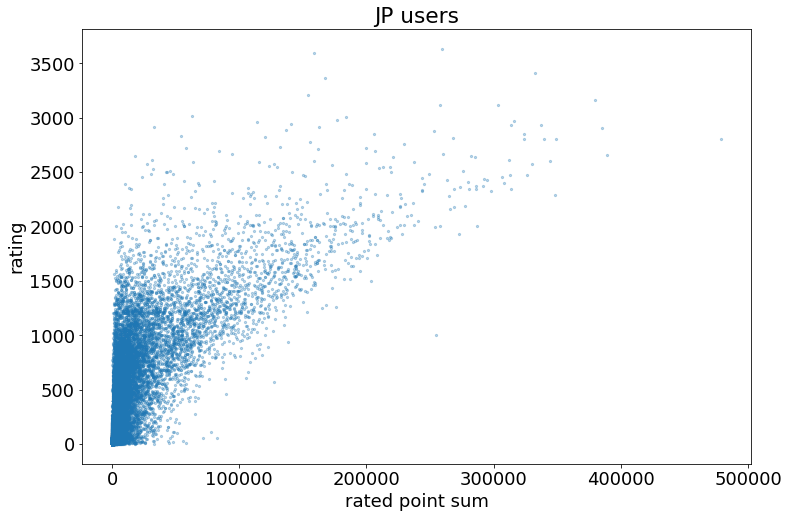

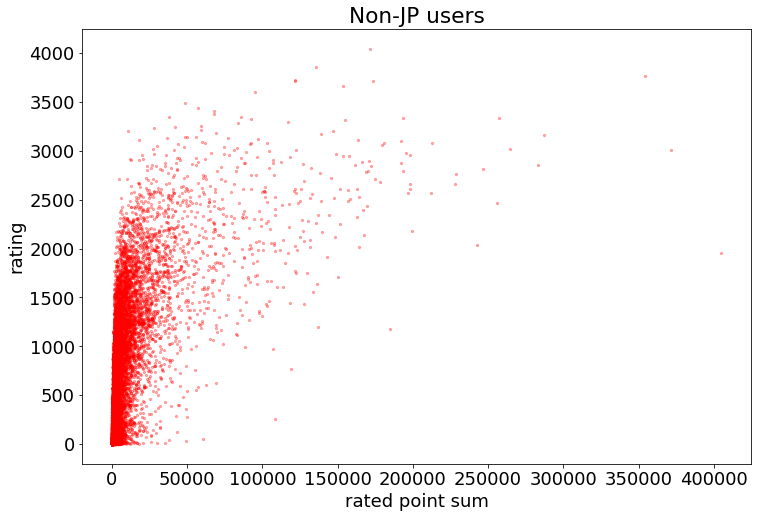

In [19]:
plt.tight_layout()
jp_user = rank[rank["country"] == "JP"]
jp_user.plot.scatter(x="rated point sum", y="rating", s=5, alpha=0.3)
plt.title("JP users")
plt.savefig("images/rated_point_sum_vs_rating.png")
nonjp_user = rank[rank["country"] != "JP"]
nonjp_user.plot.scatter(x="rated point sum", y="rating", s=5, c="r", alpha=0.3)
plt.title("Non-JP users")
plt.savefig("images/rated_point_sum_vs_rating.png")

In [20]:
# Calculate delta-rated point sum vs delta-rating

In [21]:
ranka = pd.read_csv("190704_data.csv")
ranka = ranka.set_index("user")

In [22]:
ranka.head()

,rated point sum,rating
user,,
tourist,171600.0,4044
Petr,135300.0,3854
LHiC,354400.0,3764
apiad,121500.0,3722
Um_nik,173500.0,3716


In [23]:
a_rps_dic = ranka["rated point sum"].to_dict()
a_rate_dic = ranka["rating"].to_dict()

In [24]:
rankb = pd.read_csv("190805_data.csv")
rankb["d-rps"] = None
rankb["d-rate"] = None

In [25]:
rankb["rating"].head()

0    4049
1    3862
2    3768
3    3758
4    3710
Name: rating, dtype: int64

In [26]:
import numpy as np

In [71]:
rpss = []
rates = []
for i, (user, n_rps, n_rate, d_rps, d_rate) in enumerate(rankb.values):
    if user in a_rps_dic:
        rankb.at[i, "d-rps"] = n_rps - a_rps_dic[user]
        rankb.at[i, "d-rate"] = n_rate - a_rate_dic[user]

28000.0 134


In [73]:
rankb_active = rankb[rankb["d-rps"] > 0].reset_index(drop=True)
rankb_active = rankb_active.set_index("user")
rankb_active.head()

,rated point sum,rating,d-rps,d-rate
user,,,,
tourist,180900.0,4049,9300,5
Petr,139800.0,3862,4500,8
Um_nik,182800.0,3768,9300,52
apiad,130400.0,3758,8900,36
LHiC,359100.0,3674,4700,-90


In [134]:
sep_color = [[[], []] for _ in range(8)]
color_div = [400, 800, 1200, 1600, 2000, 2400, 2800, 5000]
for n_rps, n_rate, d_rps, d_rate in rankb_active.values:
    for i in range(8):
        if n_rate < color_div[i]:
            sep_color[i][0].append(d_rps)
            sep_color[i][1].append(n_rate)
            break

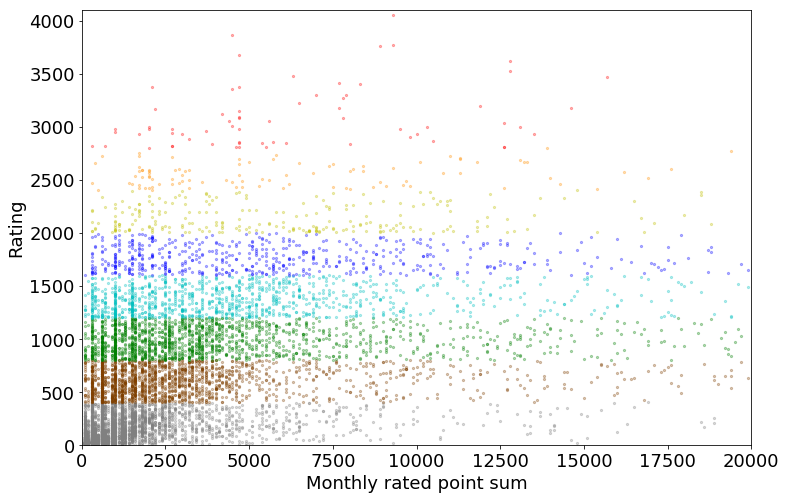

In [136]:
color_list = ["#808080", "#804000", "#008000", "#00C0C0", "#0000FF", "#C0C000", "#FF9000", "#FF0000"]
for i in range(8):
    plt.scatter(sep_color[i][0], sep_color[i][1], s=5, c=color_list[i], alpha=0.3)
plt.ylim(0, 4100)
plt.xlim(0, 20000)
plt.xlabel("Monthly rated point sum")
plt.ylabel("Rating")
plt.savefig("rate_vs_mrps_close.png")

In [143]:
rates = []
d_rpss = []
for n_rps, n_rate, d_rps, d_rate in rankb_active.values:
    if d_rps < 20000 and n_rate < 4200:
        rates.append(n_rate)
        d_rpss.append(int(d_rps))

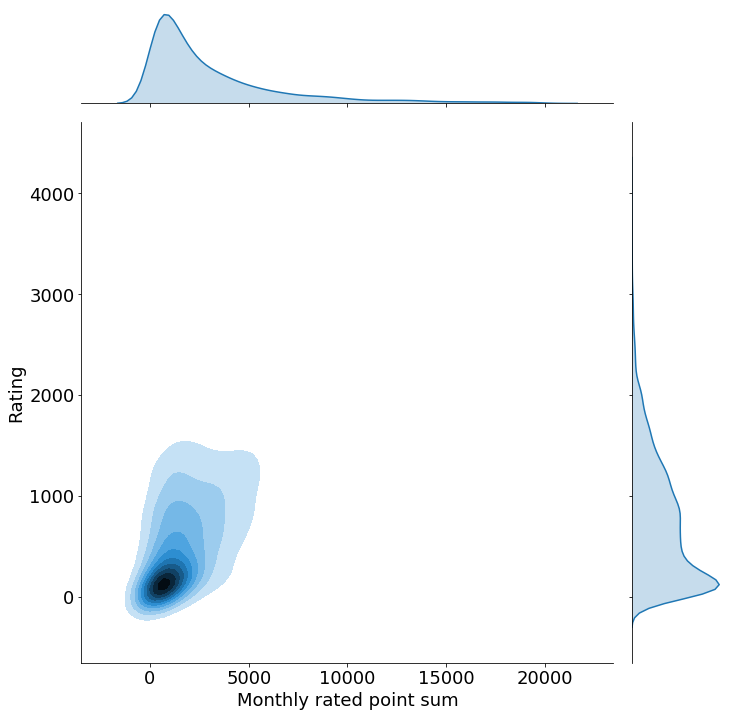

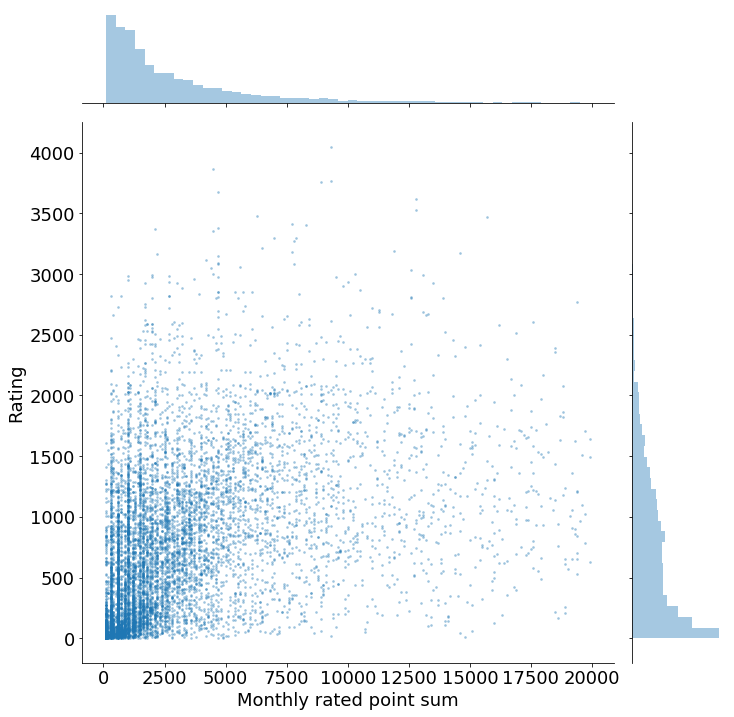

In [146]:
import seaborn as sns
import numpy as np
fig = sns.jointplot(x=d_rpss, y=rates, kind="kde", height=10)
fig.ax_joint.collections[0].set_alpha(0)
fig.set_axis_labels("Monthly rated point sum", "Rating")
fig.savefig("distplot2_close.png")
plt.show()
fig = sns.jointplot(x=d_rpss, y=rates, kind="scatter", height=10, alpha=0.3, s=3)
fig.set_axis_labels("Monthly rated point sum", "Rating")
fig.savefig("distplot_close.png")
plt.show()